In [80]:
#import tools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression


In [81]:
#import data
df_train = pd.read_csv('../datasets/house_prices_train.csv')

In [82]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\lbj6639\Miniconda3\envs\basic_python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

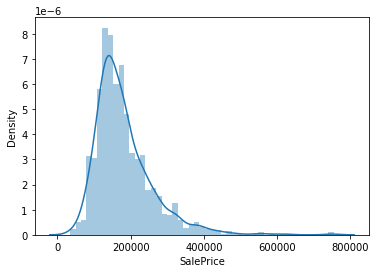

In [83]:
sns.distplot(df_train['SalePrice'])

<AxesSubplot:>

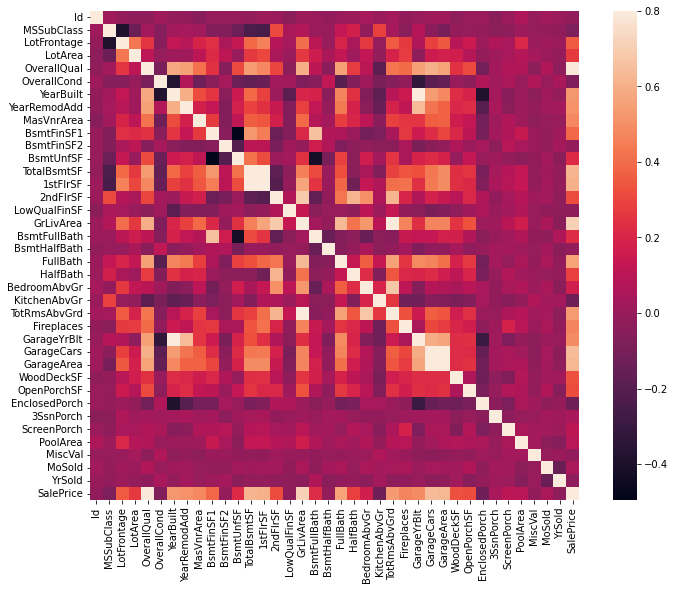

In [84]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

<AxesSubplot:>

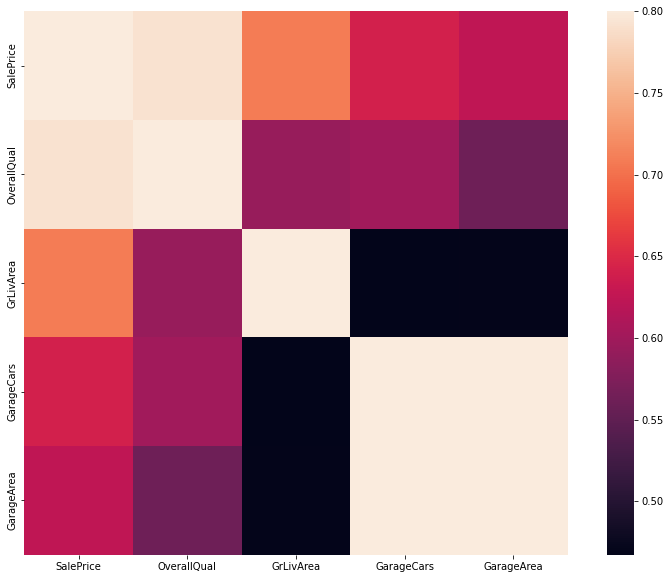

In [85]:
k = 5
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
f,ax = plt.subplots(figsize=(14,10))
sns.heatmap(df_train[cols].corr(),vmax=.8,square=True)

['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars']


C:\Users\lbj6639\Miniconda3\envs\basic_python\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


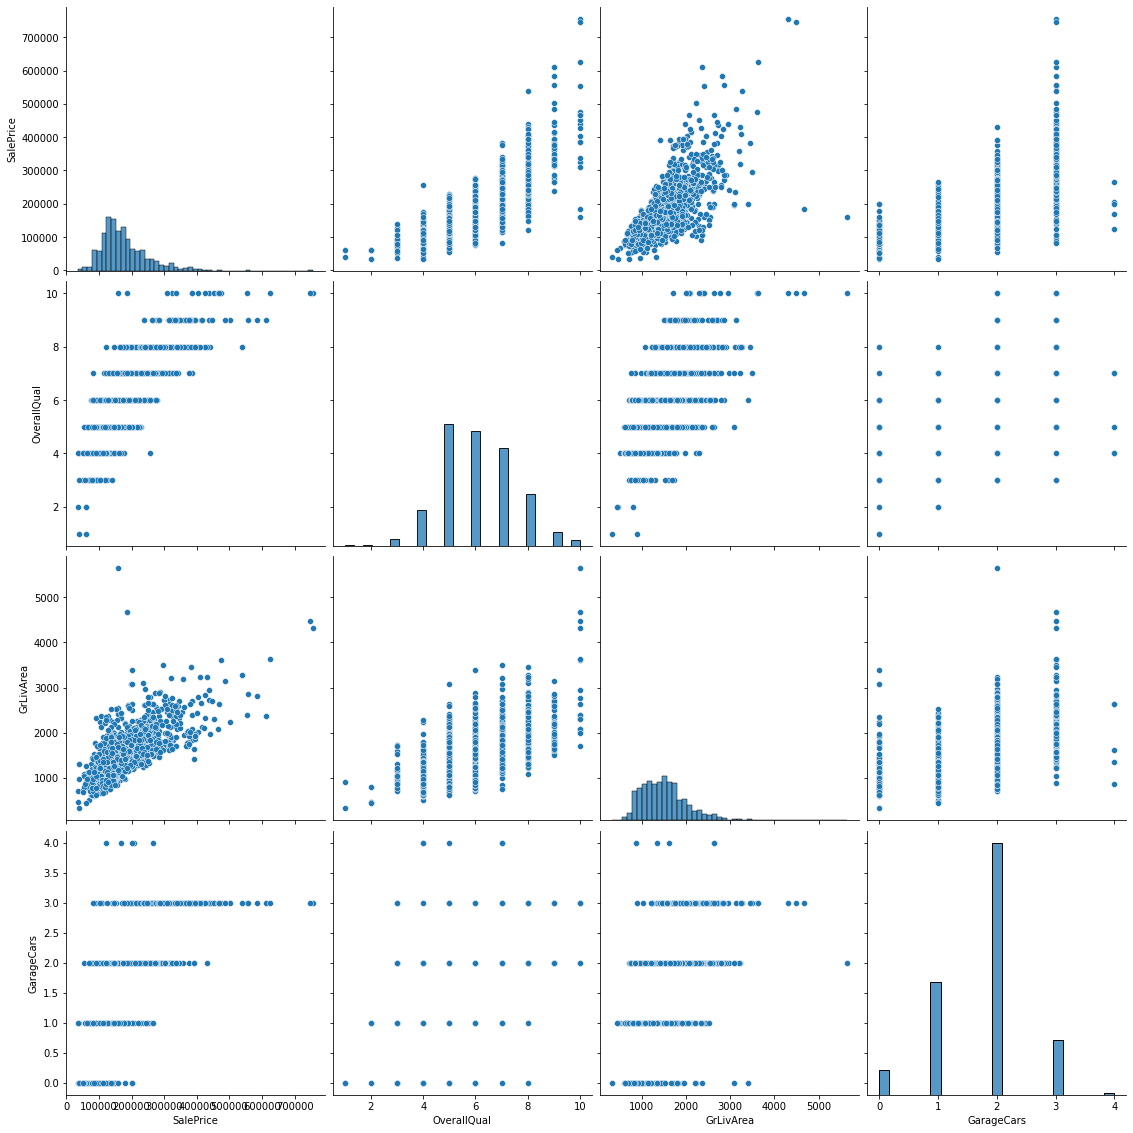

In [86]:
cols2 = []
for i in range(len(cols[:4])):
    cols2.append(cols[i])

print(cols2)


sns.pairplot(df_train[cols2],size = 4)


In [87]:
# check null
missing = df_train.isnull().sum().sort_values(ascending = False)
missing.head(20)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [88]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [89]:
X = df_train[cols2[1:]]
y = df_train[cols2[0]]
print(X)
print(y)

      OverallQual  GrLivArea  GarageCars
0               7       1710           2
1               6       1262           2
2               7       1786           2
3               7       1717           3
4               8       2198           3
...           ...        ...         ...
1455            6       1647           2
1456            6       2073           2
1457            7       2340           1
1458            5       1078           1
1459            5       1256           1

[1460 rows x 3 columns]
0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [90]:
rgr = LinearRegression()
rgr.fit(X,y)

print(f'R^2 :{rgr.score(X,y)}')

R^2 :0.7390694117518739


In [91]:
#test predict
import numpy as np

print(rgr.predict(np.array([[6,1200,2]])))

[167203.43581031]


C:\Users\lbj6639\Miniconda3\envs\basic_python\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
